# Data Programming - Assignment 2
## Exploring the MNIST data set, PCA and agglomerative hierarchical clustering methods
### Handed out: 10 November 2017 - Due by: 1 December 2017

In this assignment you will experiment and evaluate the hierarchical agglomerative clustering methods under different settings. You will work on the MNIST data set, which is a collection of hand-written digits. Due to its manageable size and popularity MNIST is a dataset you can go to for evaluating new ideas, for replicating research results, etc.

This assignment will comprise a series of small exercises. Some of the background material, e.g. `numpy`, `sklearn`, etc., will be presented during the next lectures, however you are expected to actively look for information on the web, using Python's `help` function, etc. 

The marks awarded for each exercise are indicated below and they total 35. The final mark will be rescaled to a maximum of 10.

##### Insert all imports in the cell immediately below and nowhere else in this notebook

In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.cluster import *
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

#### Fetch the MNIST data set if not already present in the current working directory:

In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original', data_home='.')

### Explore the MNIST dataset
MNIST is one of the most famous ML datasets and it contains 70,000 hand-written digits and their labels. Using `sklearn` to fetch the dataset, as above, `mnist.data` contains the data, while `mnist.target` contains the labels. 

#### (1) Find how many data points there are available and what is their size [1 mark]
#### (2) How many labels are there? [1 mark]

In [3]:
print mnist.data.shape
print mnist.target.shape
print dir(mnist)

(70000, 784)
(70000,)
['COL_NAMES', 'DESCR', 'data', 'target']


#### (3) Extract a random subset of the original data and labels and store them in variables `small_data` and `small_target`. In the remainder of this exercise we will work with these smaller sets. The cardinality of the `small_*` subsets should be 2000. [2 marks]

In [4]:
import random as r
r.seed(5)
#print r.sample([0:69999],2000)
something = r.sample( list(range(0, 69999)), 2000)
small_data = mnist.data[something]
small_target = mnist.target[something]

#### (4) Create a function to display a single digit from the MNIST data set and its label. When done, use your function to display one of the digits. Use `small_data` (as opposed to `mnist.data`). [2 marks]

In [5]:
def show_digit(ind, dataset=small_data):
    """Display the MNIST digit at index `ind` in grayscale"""
    from PIL import Image
    temp=dataset[ind].reshape(28,28)
    img = Image.fromarray(temp, 'L')
    img.show()
    pass

As a pre-processing step either for further processing or visualisation we decompose raw data into their principal components using Principal Component Analysis (PCA). This allows us to reduce the dimensionality of the data while retaining as much of their original variance as possible. `sklearn` provides PCA in the module `sklearn.decomposition`. 

#### (5) Decompose the original data into 2 components in order to be displayable on a 2D graph. Verify PCA does what is expected. [1 mark]

In [6]:
#show_digit(1500,small_data)
#print small_target[1500]


#pca = PCA(n_components=2)
#small_data_pca = pca.fit_transform(small_data)
#print pca.explained_variance_ratio_
#pca.components_[0]

In [7]:
show_digit(0)
pca = PCA(n_components=2)
pca.fit(small_data)
data2d = pca.transform(small_data)
print pca.explained_variance_ratio_


[ 0.09664387  0.07187422]


#### (6) Plot all 2D (decomposed) points on a scatter plot [1 mark]

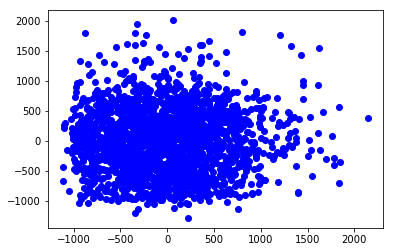

In [8]:
plt.scatter(data2d.reshape(2,2000)[0],data2d.reshape(2,2000)[1],color="b")
plt.show()


Depending on the data analysis we want to perform, we are often better off scaling raw data down to some desirable range and recentering them around a mean of 0. `sklearn` contains the necessary tools for this, or you can implement it yourselves.

#### (7) Scale the original data so that they have a mean of 0 and a stdev of 1. Verify your results. [2 marks]

In [9]:
scaled_data = scale(small_data)


/home/mscuser/anaconda2/lib/python2.7/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, _DataConversionWarning)


#### (8) Decompose the scaled points to 2 components and plot the resulting 2D points. Are there notable differences with the plot before scaling? [1 mark]

In [24]:
pca.fit(scaled_data)
scaled_data2d = pca.transform(scaled_data)
print pca.explained_variance_ratio_


[ 0.06521419  0.04518219]


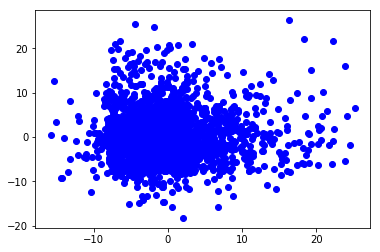

In [25]:
plt.scatter(scaled_data2d.reshape(2,2000)[0],scaled_data2d.reshape(2,2000)[1],color="b")
plt.show()


#### (9) Cluster your original and your scaled data using Ward's hierarchical agglomerative clustering method. [2 marks]

(2000, 784)
(2000, 2)


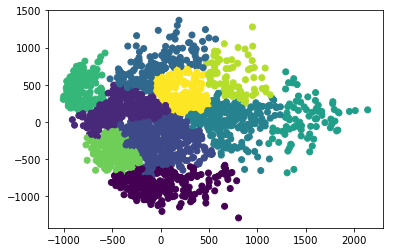

In [72]:
ward_clustering = AgglomerativeClustering(n_clusters=10).fit(data2d) 
#plot_clustering(scaled_data, small_data, ward_clustering.labels_, "ward linkage")
#print dir(ward_clustering)
#plt.show()
print small_data.shape
print data2d.shape
plt.scatter(data2d[:,0],data2d[:,1],c=ward_clustering.labels_)
plt.show()
#print ward_clustering.__dict__

#### (10) Plot the clustering outcome similar to the 2D plot above, using a different colour for each predicted class. [2 marks]

#### (11) Repeat the clustering using complete-link and average-link (instead of Ward) and plot as above. What do you observe? Which seems to be the better clustering method for the data and why? [2 marks]

In [13]:
comp_clustering = None

In [14]:
avg_clustering = None

Now we will try to measure the accuracy of our clusters using our labels. Note that as clustering is unsupervised we have no deterministic way of knowing which cluster corresponds to which real label. However we can make use of the fact that we knew the number of classes of the dataset (10).

A simple way of measuring our clustering accuracy is the following. For each real label find the cluster which contains most of its digits. Assume that this is the cluster corresponding to this label and measure its accuracy (number of correct digits/size of the cluster). Last, average over all accuracy measures to produce the overall accuracy.

#### (12) Implement a function to measure the overall accuracy of such a clustering procedure given a clustering outcome and a labels array. Use this function to measure the accuracy of `ward_clustering` and `comp_clustering`. Do you notice any potential problems with this approach? [3 marks]

In [15]:
def clustering_acc(clustering, labels):
    """Measure the overall accuracy of the given `clustering` given the `labels`"""
    return 0.

acc_ward = clustering_acc(ward_clustering, small_target)
acc_comp = clustering_acc(comp_clustering, small_target)
acc_avg = clustering_acc(avg_clustering, small_target)
print 'Ward\'s method:', acc_ward
print 'Complete link:', acc_comp
print 'Average link: ', acc_avg

Ward's method: 0.0
Complete link: 0.0
Average link:  0.0


### PCA for reducing features before clustering

So far we've used PCA for displaying our data on a 2D plot. PCA can be also used to reduce the dimensionality of our samples. This results in a smaller and often more robust representation of our original data.

#### (13) Reduce `small_data` to 10 features and recalculate the accuracies for Ward's method, complete- and average-link. How do they differ in comparison to using the complete feature set? (There is no need to plot anything for this step.) [2 marks]

In [16]:
scaled_data9d = None

In [17]:
ward_clustering = None 

In [18]:
comp_clustering = None

In [19]:
avg_clustering = None

In [20]:
acc_ward_10d = None
acc_comp_10d = None
acc_avg_10d = None
print 'Ward\'s method:', acc_ward_10d
print 'Complete link:', acc_comp_10d
print 'Average link: ', acc_avg_10d

Ward's method: None
Complete link: None
Average link:  None


#### (14) Write a new function combining feature reduction and hierarchical clustering, returning an accuracy figure based on `clustering_acc()` you have created before and the clustering produced. Use the function signature below. [2 marks]

In [21]:
def reduce_and_hcluster(n_comp, 
                        data=scaled_data, 
                        labels=small_target, 
                        linkage='ward', 
                        n_clusters=10):
    """Reduce and cluster the given data using hierarchical clustering
    Arguments:
        n_comp: the number of components to reduce the data to
        data: the data matrix
        labels: the correct labels, one for each data sample
        linkage: the clustering method to use. It can be 'ward', 
                 'complete' or 'average'
        n_clusters: the number of clusters to take into account
    Return:
        (The accuracy of the clustering with respect to the target labels, 
        the clustering produced)
    """
    return None, None

#### (15) Using `reduce_and_hcluster()`, write a loop to calculate the accuracies for all three different linkages (ward, complete and average), for reduction of n_comp=4 to 80 with a step of 2 (i.e. for n_comp=4, 6, 8, ..., 80). Store the results in three separate lists, as indicated below. Also store the best (most accurate) clustering for each linkage. [2 marks] 

In [22]:
best_ward = best_average = best_complete = None

#### (16) Plot the accuracies for the different linkages and number of components on a 2D plot. The x-axis should increase the number of components, while the y-axis should display accuracy. For each linkage choice also plot its accuracy before reducing the dimensions, which was calculated in step 12 - these should be straight lines. The plot should include a legend, axis titles and a grid, and each line should use a different line style. Is there anything worth observing from this plot? [3 marks]

Let's look at the contents of the best clustering solutions we've created in step (15).

#### (17) Complete the function below. It needs to be able to display up to 100 digits from the given cluster number in the given clustering result, using `matplotlib`. If the available digits in the cluster are more than 100, choose and display 100 at random. [4 marks] 

In [23]:
def display_100(clustering=best_ward, cl_no=0, data=small_data):
    """Display up to 100 digits from `data`, contained in the clustering product 
       `clustering` and in its cluster with number `cl_no`
    """
    pass

#### (18) Store the best clustering objects (`best_ward`, `best_complete`, `best_average`) in a single file using standard `numpy` functionality. The name of the file must be `best_clusters.npz`. Load them back and verify they are correct. [2 marks] 